# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

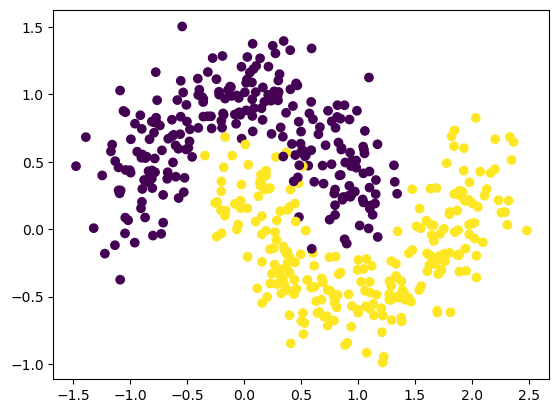

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


lr = LogisticRegression(solver='saga',
                        tol=1e-3,
                        max_iter=500
                        )

svm = SVC(kernel='linear',
          C=1.0
          )

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(kernel='linear')

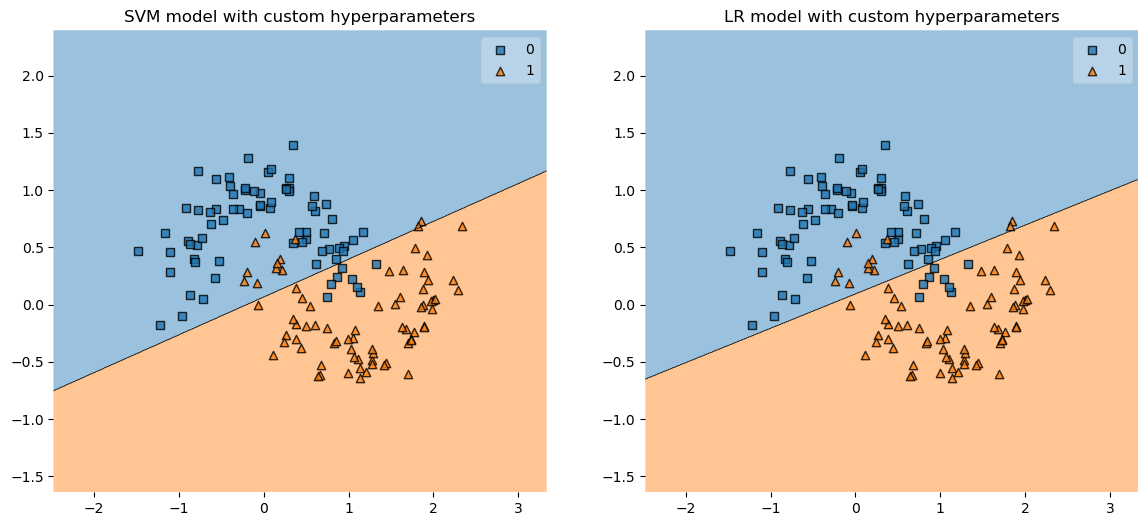

In [5]:
from sklearn.metrics import accuracy_score


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_decision_regions(X_test,
                      y_test,
                      clf=svm
                      )
plt.title("SVM model with custom hyperparameters")

plt.subplot(1, 2, 2)
plot_decision_regions(X_test,
                      y_test,
                      clf=lr
                      )
plt.title("LR model with custom hyperparameters")
plt.show()

In [6]:
print(f"SVM with linear kernel accuracy: {accuracy_score(y_test, svm.predict(X_test))}")
print(f"LR model Accuracy: {accuracy_score(y_test, lr.predict(X_test))}")

SVM with linear kernel accuracy: 0.8666666666666667
LR model Accuracy: 0.8666666666666667


### Выводы по графику, тезисно.

- Обе модели игнорируют единичные выбросы в данных, так как данные нелинейны, что является затруднительным для обеих моделей.
- Линейная граница между классами, т.к. линейное ядро в SVM и линейная модель LR. Также границы идентичны.
- При выборе одной из двух моделей, лучше не выбирать вовсе. Следует попробовать SVM с другим ядром для выявления выбросов.


## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?


=====SVC with poly kernel exp.=====


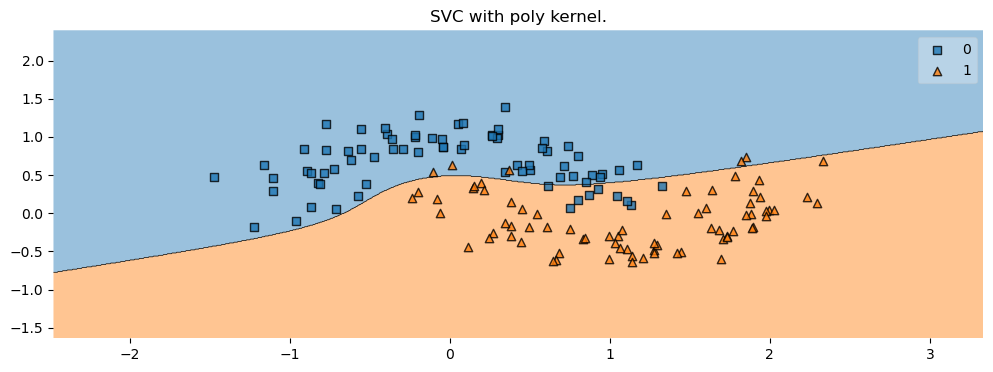


SVC with poly kernel accuracy: 0.9066666666666666


=====SVC with rbf kernel exp.=====


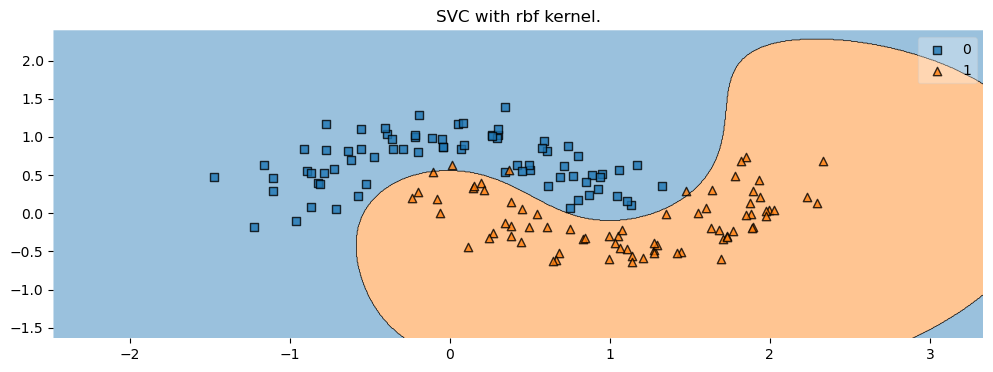


SVC with rbf kernel accuracy: 0.98


=====SVC with sigmoid kernel exp.=====


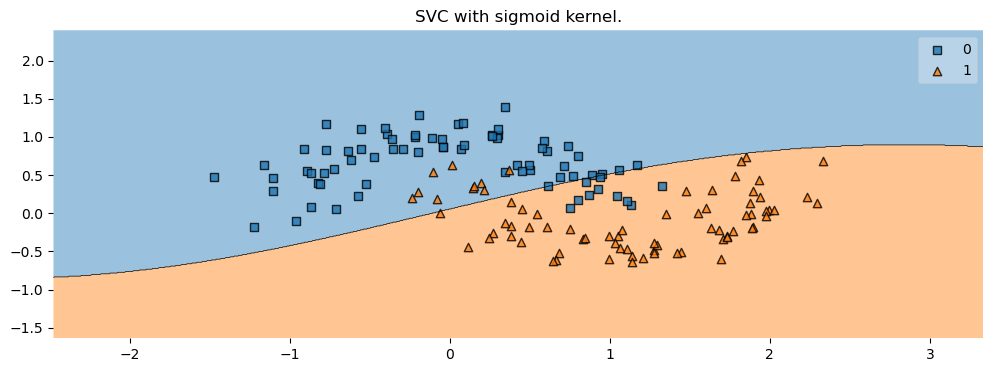


SVC with sigmoid kernel accuracy: 0.8666666666666667



In [7]:
poly_svm = SVC(kernel='poly', degree=3)
rbf_svm = SVC(kernel='rbf')
sigmoid_svm = SVC(kernel='sigmoid', C=1.0, gamma=0.1, coef0=0.1)

for model, tag in ((poly_svm, 'poly'),
                   (rbf_svm, 'rbf'),
                   (sigmoid_svm, 'sigmoid')):

    print(f'\n====={model.__class__.__name__} with {tag} kernel exp.=====')
    model.fit(X_train, y_train)

    plt.figure(figsize=(12, 4))
    plot_decision_regions(X_test,
                        y_test,
                        clf=model
                        )
    plt.title(f'{model.__class__.__name__} with {tag} kernel.')
    plt.show()
    print(f"""
{model.__class__.__name__} with {tag} kernel accuracy: {accuracy_score(y_test, model.predict(X_test))}
""")
    

### Выводы по графикам и ответы на вопросы. Тезисно.

Выводы:

- При стандартных параметрах хуже всего себя показывает sigmoid ядро с точностью 60% с большим количеством FP/FN. При подборе значений главной целью было "искривить" границу таким образом, чтобы снизить число FP/FN. Ручным перебором найдены параметры `C=1.0, gamma=0.1, coef0=0.1`. Итоговая точность - 86.7%.
- Лучше всего показывал себя rbf со стандартными параметрами и точностью 98%.
- Граница стала нелинейной, что привело к большей гибкости.
- Путем перебора значений degree лучше всего показало себя значение 3 с точностью 90%. При значениях 2 и 4 граница сильно искривлялась, увеличивая число FP & FN.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

----------------EXP FOR SVC----------------

=== Best degree is 1, accuracy is 0.9733333333333334 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: svc, Model: SVC


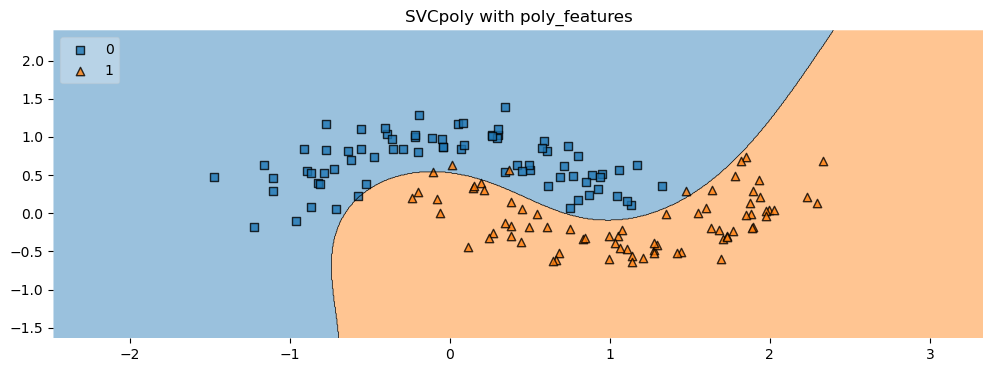

----------------EXP FOR SVC----------------

=== Best degree is 1, accuracy is 0.9733333333333334 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: svc, Model: SVC


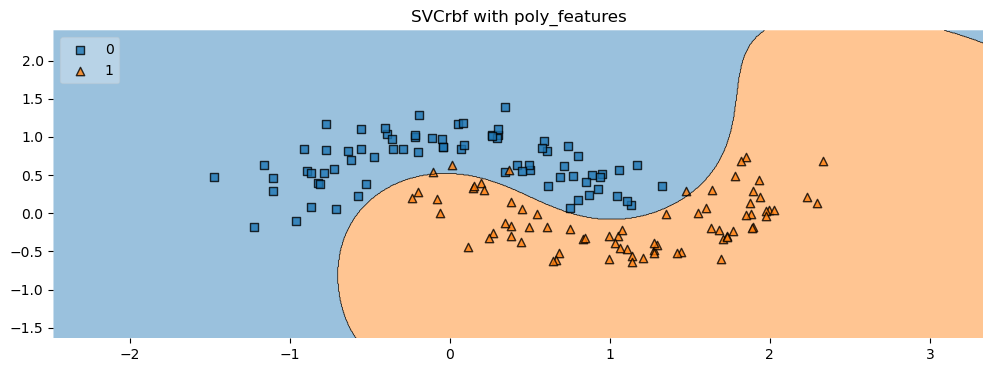

----------------EXP FOR SVC----------------

=== Best degree is 1, accuracy is 0.86 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: svc, Model: SVC


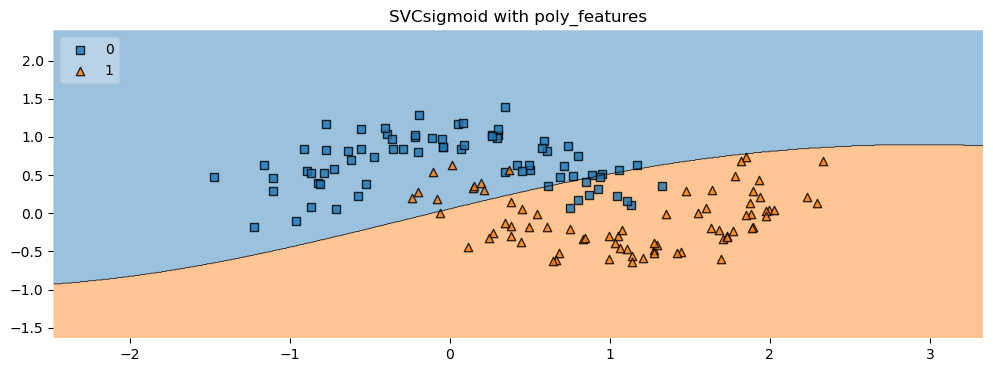

----------------EXP FOR LogisticRegression----------------

=== Best degree is 4, accuracy is 0.9466666666666667 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: logisticregression, Model: LogisticRegression


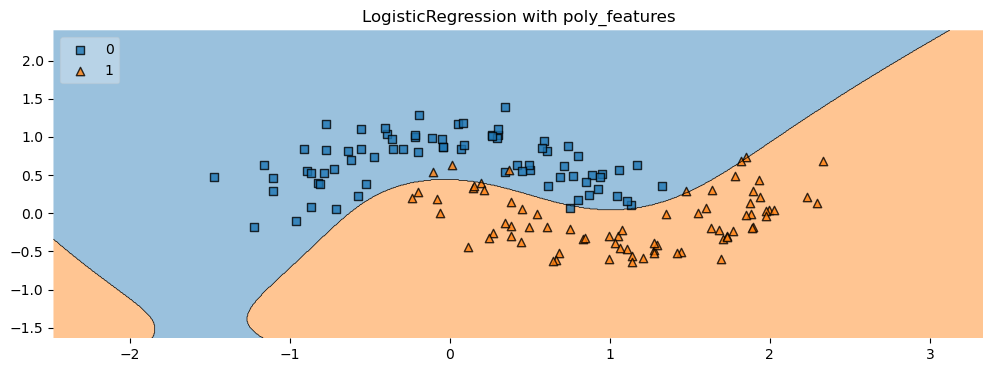

In [8]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

warnings.filterwarnings("ignore", category=ConvergenceWarning)


def _build_best_model(best_degree: int, model: object) -> None:
    pipe = make_pipeline(PolynomialFeatures(degree=best_degree), model)
    pipe.fit(X_train, y_train)
    y_pred_lrp = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred_lrp)

    print(f'''
=== Best degree is {best_degree}, accuracy is {acc} ===
''')

    m_name = None
    kern = ''
    print('Pipeline_struct:')
    for name, model_struct in pipe.steps:
        print(f"Step: {name}, Model: {model_struct.__class__.__name__}")

        if name != 'polynomialfeatures':
            m_name = model_struct.__class__.__name__

        if name == 'svc':
            kern += model_struct.kernel
        

    plt.figure(figsize=(12, 4))
    plot_decision_regions(X_test,
                        y_test,
                        clf=pipe,
                        legend=2
                        )

    plt.title(f"{m_name}{kern} with poly_features")
    return plt.show()


def find_poly_degree(degree_list = range(1, 7),
                     model: object = lr):
    acc_lst = []

    for i in degree_list:
        lr_pipe = make_pipeline(PolynomialFeatures(degree=i), model)
        lr_pipe.fit(X_train, y_train)
        y_pred_lrp = lr_pipe.predict(X_test)
        acc = accuracy_score(y_pred_lrp, y_test)
        acc_lst.append(acc)

    return _build_best_model(degree_list[acc_lst.index(max(acc_lst))], model)


for model in [poly_svm, rbf_svm, sigmoid_svm, lr]:
    print(f'----------------EXP FOR {model.__class__.__name__}----------------')
    find_poly_degree(model=model)

### Описание кода

Исходя из поставленной задачи, код делает следующее:

- На инпут подается модель.
- Для модели создается пайплайн, включающий в себя `PolynominalFeatures`
    - Пайплайн создается для избежания ошибки разнородности признаков при использовании `plot_decision_regions`
- Далее перебираются значения `degree` для `PolynominalFeatures`, пайплайн обучается и тестируется. По итогам `accuracy_score` выбирается лучшее значение `degree`.
- Билдится модель с наилучшим значением `degree`, тестируется, выводится график для модели и ее ядра (если SVC).

### Ответы:

- Результаты для SVM незначительно улучшились. У большей части моделей сократились пространства, отвечающие за классы атак/аномалий.
- `degree` для `PolynominalFeatures` выбирался на основе результатов `accuracy_score` для каждой модели индивидуально. Перебирались значения от 1 до 6.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

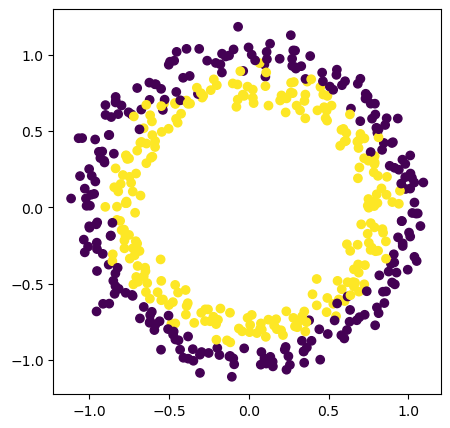

In [9]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

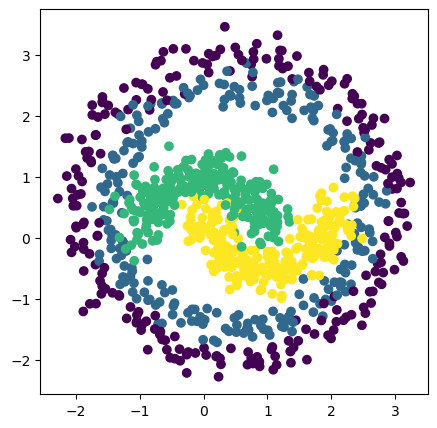

In [10]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [11]:
del X_train, X_test, y_train, y_test, model
del lr, svm, poly_svm, rbf_svm, sigmoid_svm

----------------EXP FOR RandomForestClassifier----------------

=== Best degree is 3, accuracy is 0.9266666666666666 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: randomforestclassifier, Model: RandomForestClassifier


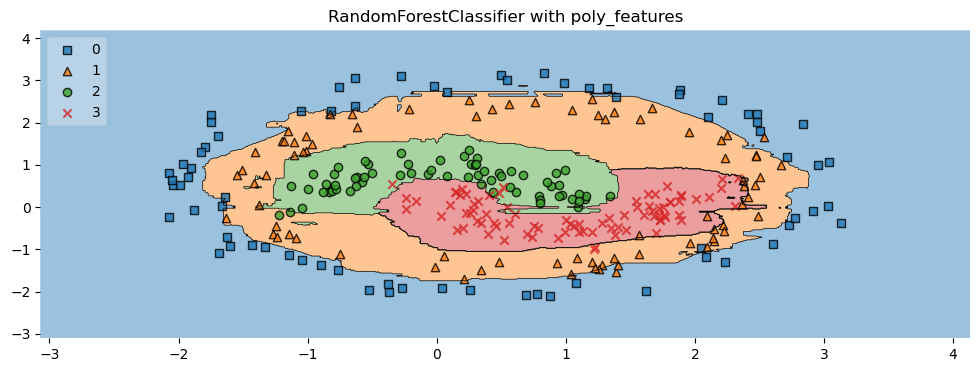

----------------EXP FOR KNeighborsClassifier----------------

=== Best degree is 2, accuracy is 0.9233333333333333 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: kneighborsclassifier, Model: KNeighborsClassifier


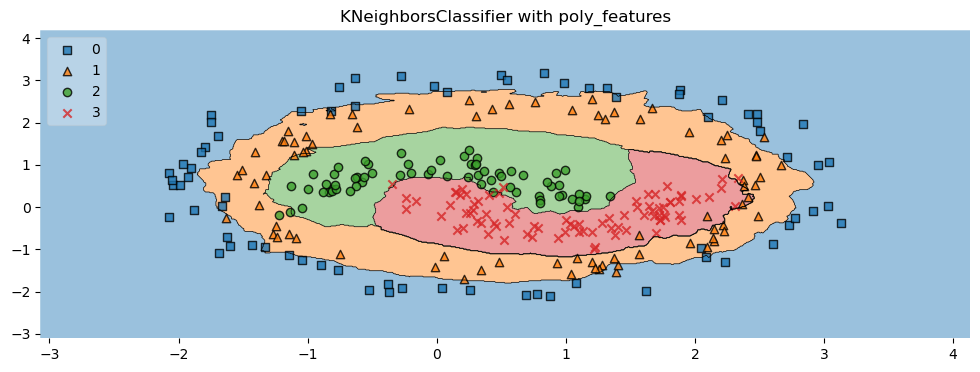

----------------EXP FOR DecisionTreeClassifier----------------

=== Best degree is 3, accuracy is 0.8933333333333333 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: decisiontreeclassifier, Model: DecisionTreeClassifier


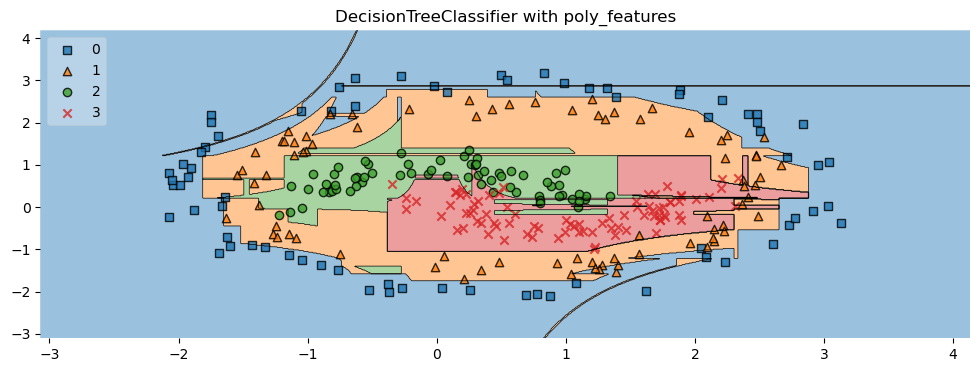

----------------EXP FOR SVC----------------

=== Best degree is 2, accuracy is 0.9433333333333334 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: svc, Model: SVC


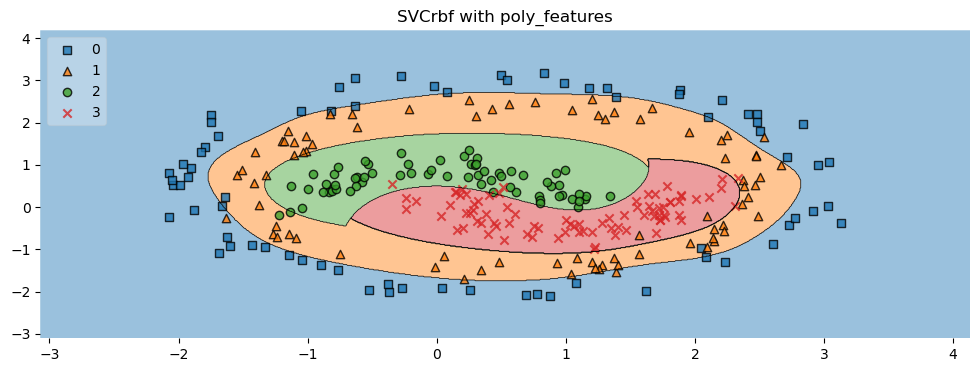

----------------EXP FOR LogisticRegression----------------

=== Best degree is 5, accuracy is 0.9466666666666667 ===

Pipeline_struct:
Step: polynomialfeatures, Model: PolynomialFeatures
Step: logisticregression, Model: LogisticRegression


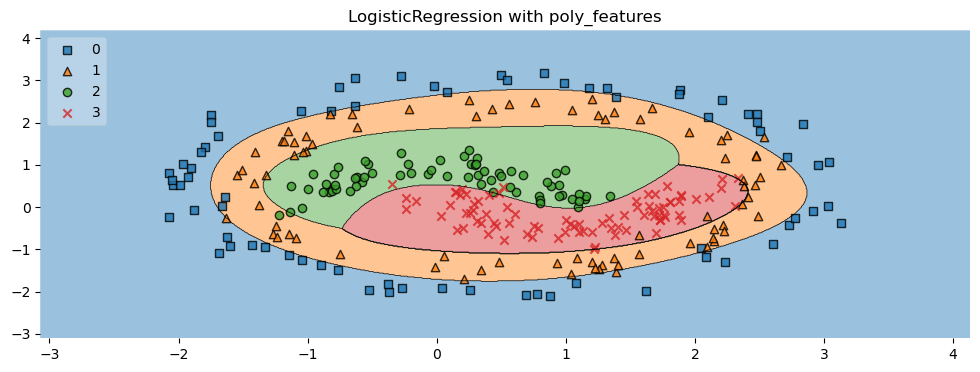

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore", message="You passed a edgecolor/edgecolors .*")
warnings.filterwarnings("ignore", category=ConvergenceWarning)


X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)
rbf_svm = SVC(kernel='rbf', gamma='auto')
lr = LogisticRegression(max_iter=1000)

models_pool = [rf_model ,knn_model ,dt_model ,rbf_svm ,lr]

for models in models_pool:
    print(f'----------------EXP FOR {models.__class__.__name__}----------------')
    find_poly_degree(model=models)